<a href="https://colab.research.google.com/github/JingfengSteven/NAM_trail/blob/trail_1/pairwise_monotonicity_new2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JingfengSteven/givemesomecredit

Cloning into 'givemesomecredit'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), 4.39 MiB | 4.13 MiB/s, done.


In [1]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
from givemesomecredit import models as nam_models
from givemesomecredit import graph_builder
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

In [2]:
orgdata=pd.read_csv("givemesomecredit/cs-training.csv")
orgdata=orgdata.dropna(axis=0)
orgdata.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
from tensorflow import float64
class1=orgdata[orgdata['SeriousDlqin2yrs'] == 1]
class0=orgdata[orgdata['SeriousDlqin2yrs'] == 0]
class0=class0[0:5000]
class1=class1[0:5000]
data=pd.concat([class0,class1],axis=0)
data=np.array(orgdata)
x=data[:,2:data.shape[1]]
y=data[:,1]
x_train=x
y_train=y
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
X_train, X_test, Y_train, Y_test = train_test_split(
      x_train, y_train, test_size=0.33, random_state=42)

In [4]:
X_train[:,[0,2]]=X_train[:,[2,0]]
X_train[:,[1,8]]=X_train[:,[8,1]]

In [5]:
def descretize(lower_bound,upper_bound,spli,step,stp):
  inpu_u=[]
  inpu_d=[]
  now_1=lower_bound[0]
  now_2=lower_bound[1]
  for i in range(spli[0]):
    now_2=lower_bound[1]
    for j in range(spli[1]):
      inpu_u.append([now_1,now_2+stp])
      inpu_d.append([now_1+stp,now_2])
      now_2+=step[1]
    now_1+=step[0]
  return inpu_u,inpu_d

lower_bound=np.array([0,0])
upper_bound=np.array([0.4,0.4])
spli=np.array([4,4])
stp=0.1
step=(upper_bound-lower_bound)/spli
inpu_u,inpu_d=descretize(lower_bound,upper_bound,spli,step,stp)

In [6]:
tf.compat.v1.reset_default_graph()
Model=nam_models.NAM(9,10,True,False,feature_dropout = 0.0,dropout = 0.0)
Model(X_train)
Model.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_nn (FeatureNN)      multiple                  150       
                                                                 
 feature_nn_1 (FeatureNN)    multiple                  140       
                                                                 
 feature_nn_2 (FeatureNN)    multiple                  140       
                                                                 
 feature_nn_3 (FeatureNN)    multiple                  140       
                                                                 
 feature_nn_4 (FeatureNN)    multiple                  140       
                                                                 
 feature_nn_5 (FeatureNN)    multiple                  140       
                                                                 
 feature_nn_6 (FeatureNN)    multiple                  140     

In [8]:
Model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics='AUC')

training_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience = 10, factor = 0.1, min_lr = 0.0001, verbose = 1),
    tf.keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
]

Model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
2519/2519 [==============================] - 19s 6ms/step - loss: 0.2020 - auc: 0.7986
Epoch 2/20
2519/2519 [==============================] - 16s 6ms/step - loss: 0.2018 - auc: 0.7975
Epoch 3/20
2519/2519 [==============================] - 13s 5ms/step - loss: 0.2019 - auc: 0.7986
Epoch 4/20
2519/2519 [==============================] - 14s 6ms/step - loss: 0.2016 - auc: 0.7989
Epoch 5/20
2519/2519 [==============================] - 15s 6ms/step - loss: 0.2016 - auc: 0.7995
Epoch 6/20
2519/2519 [==============================] - 14s 6ms/step - loss: 0.2015 - auc: 0.7992
Epoch 7/20
2519/2519 [==============================] - 15s 6ms/step - loss: 0.2015 - auc: 0.8000
Epoch 8/20
2519/2519 [==============================] - 15s 6ms/step - loss: 0.2014 - auc: 0.7994
Epoch 9/20
2519/2519 [==============================] - 17s 7ms/step - loss: 0.2014 - auc: 0.7991
Epoch 10/20
2519/2519 [==============================] - 14s 5ms/step - loss: 0.2012 - auc: 0.8016
Epoch 11/20
2519/25

In [10]:
each_epoch=100
alpha=0.1
for j in range(3):
  for i in range(each_epoch):
    Model.network_learn(X_train,Y_train,inpu_u,inpu_d,alpha)
  alpha*=10


tf.Tensor([0.20893003], shape=(1,), dtype=float32)
tf.Tensor([0.20880495], shape=(1,), dtype=float32)
tf.Tensor([0.20874631], shape=(1,), dtype=float32)
tf.Tensor([0.20860325], shape=(1,), dtype=float32)
tf.Tensor([0.20856354], shape=(1,), dtype=float32)
tf.Tensor([0.20840347], shape=(1,), dtype=float32)
tf.Tensor([0.20837279], shape=(1,), dtype=float32)
tf.Tensor([0.20820577], shape=(1,), dtype=float32)
tf.Tensor([0.20818263], shape=(1,), dtype=float32)
tf.Tensor([0.20800887], shape=(1,), dtype=float32)
tf.Tensor([0.2079935], shape=(1,), dtype=float32)
tf.Tensor([0.20781347], shape=(1,), dtype=float32)
tf.Tensor([0.20780545], shape=(1,), dtype=float32)
tf.Tensor([0.20761956], shape=(1,), dtype=float32)
tf.Tensor([0.20761836], shape=(1,), dtype=float32)
tf.Tensor([0.20742686], shape=(1,), dtype=float32)
tf.Tensor([0.20743234], shape=(1,), dtype=float32)
tf.Tensor([0.20723541], shape=(1,), dtype=float32)
tf.Tensor([0.20723893], shape=(1,), dtype=float32)
tf.Tensor([0.20704485], shape=(1

In [11]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred=np.array(Model(X_train))
roc_auc_score(Y_train, y_pred)

0.8081950052358243

[[0.13070321 4.80309296 5.57792425 5.6772337 ]
 [4.05252886 5.46092558 5.66353464 5.68683386]
 [5.22789574 5.63445187 5.68387318 5.68875837]
 [5.57349777 5.677073   5.68837833 5.68890381]]


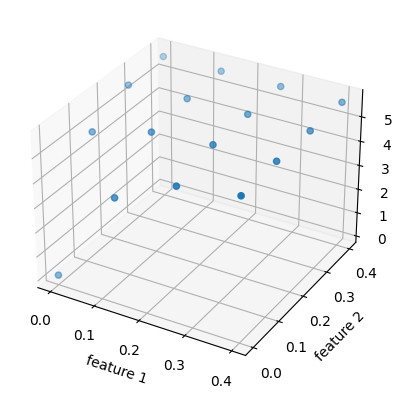

In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(lower_bound[0],upper_bound[0],spli[0])
dy=np.linspace(lower_bound[1],upper_bound[1],spli[1])
x=[]
y=[]
z=[]
ma=np.zeros((int(spli[0]),int(spli[1])))

temp=np.zeros(len(X_train[0]))
for i in range(int(spli[0])):
  for j in range(int(spli[1])):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print(ma)